TODO:

* Check threshold for running learn. why set to random different numbers for each? just use default?

[0    44.7609
Name: s, dtype: float64, 0    259.1877
Name: s, dtype: float64, 0    1212.9208
Name: s, dtype: float64, 0    2400.0018
Name: s, dtype: float64]
(0.923388780760936, 0.0)
(1232,)


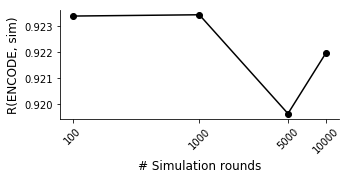

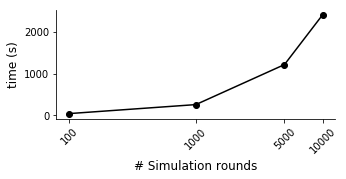

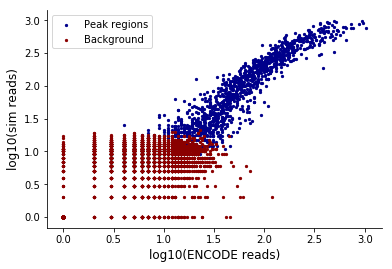

In [70]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import pandas as pd
import scipy.stats

scatternum = 100
#ymax = 2
#xmax = 2.5
NUMCOPIES = np.array([1, 5, 10, 50, 100, 500, 1000, 5000, 10000])
modifier = ""

OUTPREFIX = "GM12878_H3K27ac_ENCFF097SQI_ENCFF465WTH"
WINDOWSIZE = 5
#NUMCOPIES = [1000]
#modifier="+ischip"
#scatternum = 100
NUMCOPIES = [100,1000,5000,10000]
#modifier="+chipulate"

#OUTPREFIX = "GM12878_H3K4me1_ENCFF252ZII_ENCFF966LMJ"
#WINDOWSIZE = 5


#OUTPREFIX = "K562_H3K4me3_ENCFF681JQI_ENCFF127XXD"
#WINDOWSIZE = 5
#NUMCOPIES = [100,1000,5000,10000]
#modifier="+chipulate"

#OUTPREFIX = "GM12878_IKZF1_ENCFF216YZE_ENCFF795PEX"
#WINDOWSIZE = 1
#ymax = 3
#xmax = 3.5
#modifier = "_paired"

#OUTPREFIX = "K562_NFYA_ENCFF000YUR_ENCFF003WYE"
#WINDOWSIZE = 1
#NUMCOPIES = [100,1000,5000,10000]
#modifier = "+chipulate"

peak = pd.read_csv("windows/%s-%skb.peak.encode.counts"%(OUTPREFIX, WINDOWSIZE),
                         sep="\t",
                         names=["chrom","start","end","encode"])
nopeak = pd.read_csv("windows/%s-%skb.nopeak.encode.counts"%(OUTPREFIX, WINDOWSIZE),
                         sep="\t",
                         names=["chrom","start","end","encode"])

corrs = []
times = []
# Get numcopies vs. r2, numcopies vs. time - TODO
for nc in NUMCOPIES:
    dfp = pd.read_csv("windows/%s-%skb.peak.numcopies%s.counts"%(OUTPREFIX+modifier, WINDOWSIZE, nc), sep="\t", names=["chrom","start","end",nc])
    dfnp = pd.read_csv("windows/%s-%skb.nopeak.numcopies%s.counts"%(OUTPREFIX+modifier, WINDOWSIZE, nc), sep="\t", names=["chrom","start","end",nc])
    peak[nc] = dfp[nc]
    nopeak[nc] = dfnp[nc]
    corrs.append(scipy.stats.pearsonr(np.log10(peak["encode"]+1), np.log10(peak[nc]+1))[0])
    metrics = pd.read_csv("metrics/%s-numcopies%s.sim_metrics"%(OUTPREFIX+modifier, nc), sep="\t")
    times.append(metrics["s"])

# Numcopies vs. pearson R
fig = plt.figure()
fig.set_size_inches((5, 2))
ax = fig.add_subplot(111)
ax.plot(np.log10(NUMCOPIES), corrs, color="black", marker="o")
ax.set_xticks(np.log10(NUMCOPIES))
ax.set_xticklabels(NUMCOPIES, rotation=45)
ax.set_xlabel("# Simulation rounds", size=12)
ax.set_ylabel("R(ENCODE, sim)", size=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.savefig(OUTPREFIX+modifier+"-numcopies.pdf")

# Numcopies vs. time
fig = plt.figure()
fig.set_size_inches((5, 2))
ax = fig.add_subplot(111)
print(list(times))
ax.plot(np.log10(NUMCOPIES), times, color="black", marker="o")
ax.set_xticks(np.log10(NUMCOPIES))
ax.set_xticklabels(NUMCOPIES, rotation=45)
ax.set_xlabel("# Simulation rounds", size=12)
ax.set_ylabel("time (s)", size=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.savefig(OUTPREFIX+modifier+"-time.pdf")


# Get scatter plot of counts
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(np.log10(peak["encode"]+1), np.log10(peak[scatternum]+1), color="darkblue", s=5, label="Peak regions")
ax.scatter(np.log10(nopeak["encode"]+1), np.log10(nopeak[scatternum]+1), color="darkred", s=5, label="Background")
print(scipy.stats.pearsonr(np.log10(peak["encode"]+1), np.log10(peak[scatternum]+1)))
print(peak[scatternum].shape)
#ax.set_xlim(left=-0.1, right=xmax)
#ax.set_ylim(bottom=-0.1, top=ymax)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel("log10(ENCODE reads)", size=12)
ax.set_ylabel("log10(sim reads)", size=12);
ax.legend(loc="upper left");
fig.savefig(OUTPREFIX+modifier+"-scatter.pdf")